In [ ]:
import os
import sys

def add_path():
    path = os.path.abspath(os.path.join(os.getcwd(), "../"))
    if path not in sys.path:
        sys.path.append(path)
    
    path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
    if path not in sys.path:
        sys.path.append(path)

In [ ]:
add_path()
import pyvista
import matplotlib.pyplot as plt
import numpy as np
from intuitive_understanding_of_linear_algebra.src import utils
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



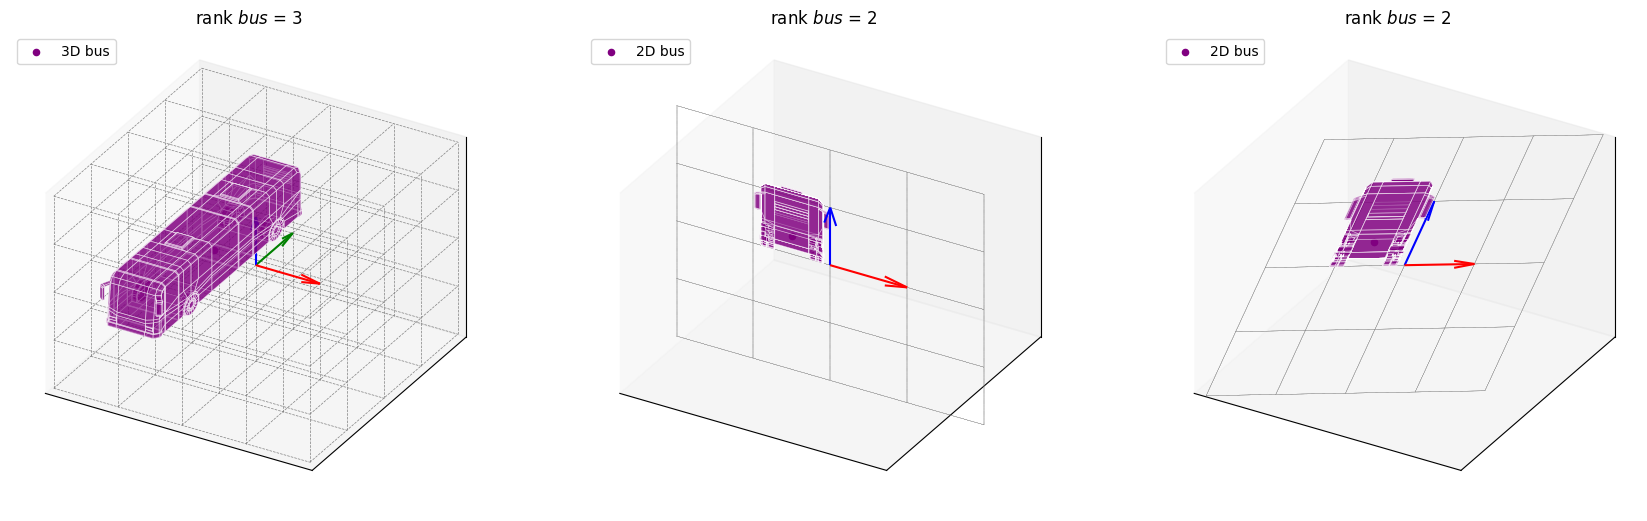

In [91]:
add_path()
import pyvista
import matplotlib.pyplot as plt
import numpy as np
from intuitive_understanding_of_linear_algebra.src import utils
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(21, 7))

ax1 = fig.add_subplot(131, projection="3d")
ax1.set_proj_type("ortho")

xlim = (-2, 2)
ylim = (-2, 2)
zlim = (-2, 2)

standard_basis = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
).astype(float)

utils.plot_full_custom_3d_grid(ax1, standard_basis.T, xlim, ylim, zlim)

bus = pyvista.read(r"../assets/bus.obj")

bus.points *= 0.5
bus.points[:, [1, 2]] = bus.points[:, [2, 1]]
bus.points[:, [0, 1]] = bus.points[:, [1, 0]]
bus.points[:, [1]] *= -1
bus.points[:, [0]] *= -0.8
bus.points[:, [0, 1]] -= 0.5

faces = []
i = 0
while i < len(bus.faces):
    n = bus.faces[i]
    faces.append(bus.faces[i+1:i+1+n])
    i += n + 1

mesh_poly = [[bus.points[vertex] for vertex in face] for face in faces]

centroid = bus.points.mean(0)
ax1.scatter(centroid[0], centroid[1], centroid[2], color="purple", label="3D bus")

ax1.set_title("rank $bus$ = {}".format(np.linalg.matrix_rank(bus.points.T)))
ax1.quiver(0, 0, 0, standard_basis[0][0], standard_basis[1][0], standard_basis[2][0], color="r")
ax1.quiver(0, 0, 0, standard_basis[0][1], standard_basis[1][1], standard_basis[2][1], color="g")
ax1.quiver(0, 0, 0, standard_basis[0][2], standard_basis[1][2], standard_basis[2][2], color="b")
ax1.add_collection3d(Poly3DCollection(mesh_poly, color="purple", alpha=0.6, edgecolor="white", linewidth=0.5))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_aspect("auto")
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(132, projection="3d")
ax2.set_proj_type("ortho")

matrix_a = np.array(
    [
        [1.2, 0, 0],
        [0, 0, 0],
        [0, 0, 1.2]
    ]
)

transformed_bus_a = bus.copy()
transformed_bus_a.points = (matrix_a @ transformed_bus_a.points.T).T 
transformed_bus_poly = [[transformed_bus_a.points[vertex] for vertex in face] for face in faces]

centroid = transformed_bus_a.points.mean(0)
ax2.scatter(centroid[0], centroid[1], centroid[2], color="purple", label="2D bus")

utils.plot_full_custom_3d_grid(ax2, matrix_a.T, xlim, ylim, zlim, linewidth=0.15)
ax2.set_title("rank $bus$ = {}".format(np.linalg.matrix_rank(transformed_bus_a.points.T)))
ax2.quiver(0, 0, 0, matrix_a[0][0], matrix_a[1][0], matrix_a[2][0], color="r")
ax2.quiver(0, 0, 0, matrix_a[0][1], matrix_a[1][1], matrix_a[2][1], color="g")
ax2.quiver(0, 0, 0, matrix_a[0][2], matrix_a[1][2], matrix_a[2][2], color="b")
ax2.add_collection3d(Poly3DCollection(transformed_bus_poly, color="purple", alpha=0.6, edgecolor="white", linewidth=0.5))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim(zlim)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_aspect("auto")
ax2.legend(loc="upper left")

ax3 = fig.add_subplot(133, projection="3d")
ax3.set_proj_type("ortho")

matrix_b = np.array(
    [
        [0.8, 0, 0],
        [0.5, 0.7, 0.8],
        [0, 0, 0.8]
    ]
)

transformed_bus_b = transformed_bus_a.copy()
transformed_bus_b.points = (matrix_b @ transformed_bus_b.points.T).T 
transformed_bus_poly = [[transformed_bus_b.points[vertex] for vertex in face] for face in faces]

centroid = transformed_bus_b.points.mean(0)
ax3.scatter(centroid[0], centroid[1], centroid[2], color="purple", label="2D bus")

matrix_b[:, [1]] = 0
utils.plot_full_custom_3d_grid(ax3, matrix_b.T, xlim, ylim, zlim, linewidth=0.15)
ax3.set_title("rank $bus$ = {}".format(np.linalg.matrix_rank(transformed_bus_b.points.T)))
ax3.quiver(0, 0, 0, matrix_b[0][0], matrix_b[1][0], matrix_b[2][0], color="r")
ax3.quiver(0, 0, 0, matrix_b[0][1], matrix_b[1][1], matrix_b[2][1], color="g")
ax3.quiver(0, 0, 0, matrix_b[0][2], matrix_b[1][2], matrix_b[2][2], color="b")
ax3.add_collection3d(Poly3DCollection(transformed_bus_poly, color="purple", alpha=0.6, edgecolor="white", linewidth=0.5))
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.set_zlim(zlim)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])
ax3.set_aspect("auto")
ax3.legend(loc="upper left")

plt.show()